In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Load Dataset

In [21]:
data = pd.read_csv('data/data_samsung.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25200.0,25200.0,24100.0,24100.0,1157.629150,15346950.0
1,2016-01-05,24040.0,24360.0,23720.0,24160.0,1160.511230,10800100.0
2,2016-01-06,24160.0,24160.0,23360.0,23500.0,1128.808350,18337600.0
3,2016-01-07,23320.0,23660.0,23020.0,23260.0,1117.280273,14119400.0
4,2016-01-08,23260.0,23720.0,23260.0,23420.0,1124.965698,12888150.0


# Compute Mid Price

In [22]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

# Create Windows

In [23]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [24]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((856, 50, 1), (95, 50, 1))

# Build a Model

In [25]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [26]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Train on 856 samples, validate on 95 samples
Epoch 1/20
856/856 [==============================] - 3s 4ms/step - loss: nan - val_loss: nan
Epoch 2/20
856/856 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
856/856 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 4/20
856/856 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 5/20
856/856 [==============================] - 2s 3ms/step - loss: nan - val_loss: nan
Epoch 6/20
856/856 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 7/20
856/856 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 8/20
856/856 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 9/20
856/856 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 10/20
856/856 [==============================] - 3s 3ms/step - loss: nan - val_loss: nan
Epoch 11/20
85

# Prediction

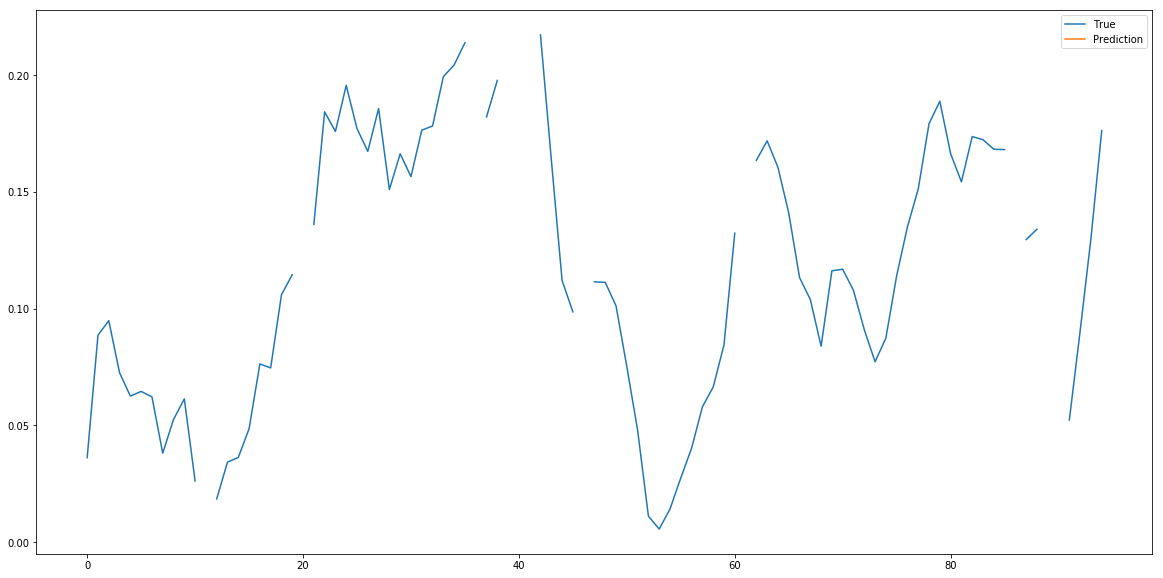

In [30]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [28]:
for i in range(5):
    print('종가 : ', y_test[i], '/ 예측가 : ', pred[i])

종가 :  0.03618421052631571 / 예측가 :  [nan]
종가 :  0.08861469433538982 / 예측가 :  [nan]
종가 :  0.09484193011647246 / 예측가 :  [nan]
종가 :  0.07255864702673209 / 예측가 :  [nan]
종가 :  0.06256742179072283 / 예측가 :  [nan]
